In [1]:
# mount the google drive on colab platform

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Dissertation/data/batters.xlsx")

In [3]:
df.columns

Index(['Player', 'Runs', 'Not_Out', 'BF', 'Fours', 'Sixes', 'SR', 'Inns',
       'Opposition', 'Ground', 'Start_Date', 'Player_Name', 'Country'],
      dtype='object')

In [4]:
df.head(5)

,Player,Runs,Not_Out,BF,Fours,Sixes,SR,Inns,Opposition,Ground,Start_Date,Player_Name,Country
0,Zeeshan Kukikhel (HUN),137,0,49,7,15,279.59,2,Austria,Lower Austria,5 Jun 2022,Zeeshan Kukikhel,HUN
1,HG Munsey (SCOT),132,0,61,15,6,216.39,1,Austria,Edinburgh (Golden),25 Jul 2023,HG Munsey,SCOT
2,OJ Hairs (SCOT),127,1,53,14,8,239.62,1,Italy,Edinburgh,24 Jul 2023,OJ Hairs,SCOT
3,Shubman Gill (IND),126,1,63,12,7,200,1,New Zealand,Ahmedabad,1 Feb 2023,Shubman Gill,IND
4,V Kohli (IND),122,1,61,12,6,200,1,Afghanistan,Dubai (DSC),8 Sep 2022,V Kohli,IND


In [5]:
def replace_values(value):
    if value == 'DNB':
      return 0
    elif value == 'TDNB':
      return 0
    elif value == 'absent':
      return 0
    elif value == 'sub':
      return 0
    elif value == '-':
      return 0
    else:
      return value

df['Runs'] = df['Runs'].apply(replace_values)
df['BF'] = df['BF'].apply(replace_values)
df['Fours'] = df['Fours'].apply(replace_values)
df['Sixes'] = df['Sixes'].apply(replace_values)
df['SR'] = df['SR'].apply(replace_values)

In [6]:
df

,Player,Runs,Not_Out,BF,Fours,Sixes,SR,Inns,Opposition,Ground,Start_Date,Player_Name,Country
0,Zeeshan Kukikhel (HUN),137,0,49,7,15,279.59,2,Austria,Lower Austria,5 Jun 2022,Zeeshan Kukikhel,HUN
1,HG Munsey (SCOT),132,0,61,15,6,216.39,1,Austria,Edinburgh (Golden),25 Jul 2023,HG Munsey,SCOT
2,OJ Hairs (SCOT),127,1,53,14,8,239.62,1,Italy,Edinburgh,24 Jul 2023,OJ Hairs,SCOT
3,Shubman Gill (IND),126,1,63,12,7,200.00,1,New Zealand,Ahmedabad,1 Feb 2023,Shubman Gill,IND
4,V Kohli (IND),122,1,61,12,6,200.00,1,Afghanistan,Dubai (DSC),8 Sep 2022,V Kohli,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,Shaik Basha (TAN),0,0,0,0,0,0.00,2,Rwanda,Rwanda,22 Aug 2023,Shaik Basha,TAN
16741,SA Jumbe (TAN),0,0,0,0,0,0.00,2,Rwanda,Rwanda,22 Aug 2023,SA Jumbe,TAN
16742,YM Nkanya (TAN),0,0,0,0,0,0.00,2,Rwanda,Rwanda,22 Aug 2023,YM Nkanya,TAN
16743,AM Kimote (TAN),0,0,0,0,0,0.00,2,Rwanda,Rwanda,22 Aug 2023,AM Kimote,TAN


In [7]:
import csv

unique_ground = df['Ground'].unique()

with open('unique_ground.csv', 'w', newline='') as f:
  csv_writer = csv.writer(f)
  for ground in unique_ground:
    csv_writer.writerow([ground])

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encoding to categorical features

from sklearn.preprocessing import LabelEncoder
features = ['Player','Opposition','Ground']
le = LabelEncoder()
for feature in features:
 le.fit(df[feature].unique())
 df[feature] = le.transform(df[feature])
 print(feature, df[feature].unique())

Player [1910  656 1274 ... 1917 1039    3]
Opposition [ 3 41 58  0 78 11 22 37 47 79 20 81 38 49 61 84  6 65 52 23 28 36 54 63
 64  5 39 43 60 72 90 85 62 82 25 92 73 26 31 68  1 13  9 35 46 76  2 89
 87 45 80 29 66 56 10 71 34 14 57 24 18 53 55 88  7 70 69 42  4 17 50 93
 67 33 77 48 19 32 74 12 15 27 30 91 83 75 21 44 16  8 86 51 59 40]
Ground [ 62  40  39   2  35  26  91  74  77  65  88  54  83   3 103  70  57  53
 102  96  87  14  46  59  85  36  18  23  19  60 108  51  90  95  10  50
  17  12  21  55  72   7 107  79   0  16  63  44  82   5  69  33   1  48
  61  89  76  52  27  80  66   4  20  30  28  37  41   9 100  42  32   8
  56  34  15  78  43  67 105  68  29  92  49  38  86  64  47  93   6  24
  81  99  45  58  84  25  73  22 104  94  75  97  98 101  13  71 106  31
  11]


In [9]:
df.head(5)

,Player,Runs,Not_Out,BF,Fours,Sixes,SR,Inns,Opposition,Ground,Start_Date,Player_Name,Country
0,1910,137,0,49,7,15,279.59,2,3,62,5 Jun 2022,Zeeshan Kukikhel,HUN
1,656,132,0,61,15,6,216.39,1,3,40,25 Jul 2023,HG Munsey,SCOT
2,1274,127,1,53,14,8,239.62,1,41,39,24 Jul 2023,OJ Hairs,SCOT
3,1664,126,1,63,12,7,200.00,1,58,2,1 Feb 2023,Shubman Gill,IND
4,1795,122,1,61,12,6,200.00,1,0,35,8 Sep 2022,V Kohli,IND


In [10]:
df['Inns'].unique()

array([2, 1, '-'], dtype=object)

In [11]:
df = df[df['Inns'] != '-']

In [12]:
df

,Player,Runs,Not_Out,BF,Fours,Sixes,SR,Inns,Opposition,Ground,Start_Date,Player_Name,Country
0,1910,137,0,49,7,15,279.59,2,3,62,5 Jun 2022,Zeeshan Kukikhel,HUN
1,656,132,0,61,15,6,216.39,1,3,40,25 Jul 2023,HG Munsey,SCOT
2,1274,127,1,53,14,8,239.62,1,41,39,24 Jul 2023,OJ Hairs,SCOT
3,1664,126,1,63,12,7,200.00,1,58,2,1 Feb 2023,Shubman Gill,IND
4,1795,122,1,61,12,6,200.00,1,0,35,8 Sep 2022,V Kohli,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,1646,0,0,0,0,0,0.00,2,69,87,22 Aug 2023,Shaik Basha,TAN
16741,1537,0,0,0,0,0,0.00,2,69,87,22 Aug 2023,SA Jumbe,TAN
16742,1867,0,0,0,0,0,0.00,2,69,87,22 Aug 2023,YM Nkanya,TAN
16743,110,0,0,0,0,0,0.00,2,69,87,22 Aug 2023,AM Kimote,TAN


In [13]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Runs', 'BF', 'Fours', 'Sixes', 'SR']] = scaler.fit_transform(df[['Runs', 'BF', 'Fours', 'Sixes', 'SR']])

<ipython-input-13-064824fe9479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Runs', 'BF', 'Fours', 'Sixes', 'SR']] = scaler.fit_transform(df[['Runs', 'BF', 'Fours', 'Sixes', 'SR']])


In [14]:
df

,Player,Runs,Not_Out,BF,Fours,Sixes,SR,Inns,Opposition,Ground,Start_Date,Player_Name,Country
0,1910,7.267755,0,3.214519,3.463299,14.085930,2.895646,2,3,62,5 Jun 2022,Zeeshan Kukikhel,HUN
1,656,6.978291,0,4.202120,8.050915,5.396518,2.016485,1,3,40,25 Jul 2023,HG Munsey,SCOT
2,1274,6.688828,1,3.543719,7.477463,7.327499,2.339632,1,41,39,24 Jul 2023,OJ Hairs,SCOT
3,1664,6.630935,1,4.366720,6.330559,6.362009,1.788488,1,58,2,1 Feb 2023,Shubman Gill,IND
4,1795,6.399364,1,4.202120,6.330559,5.396518,1.788488,1,0,35,8 Sep 2022,V Kohli,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16740,1646,-0.663547,0,-0.818183,-0.550866,-0.396423,-0.993664,2,69,87,22 Aug 2023,Shaik Basha,TAN
16741,1537,-0.663547,0,-0.818183,-0.550866,-0.396423,-0.993664,2,69,87,22 Aug 2023,SA Jumbe,TAN
16742,1867,-0.663547,0,-0.818183,-0.550866,-0.396423,-0.993664,2,69,87,22 Aug 2023,YM Nkanya,TAN
16743,110,-0.663547,0,-0.818183,-0.550866,-0.396423,-0.993664,2,69,87,22 Aug 2023,AM Kimote,TAN


In [15]:
df = df.drop(['Start_Date'], axis = 1)

<ipython-input-16-241878c25ca2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


<Axes: >

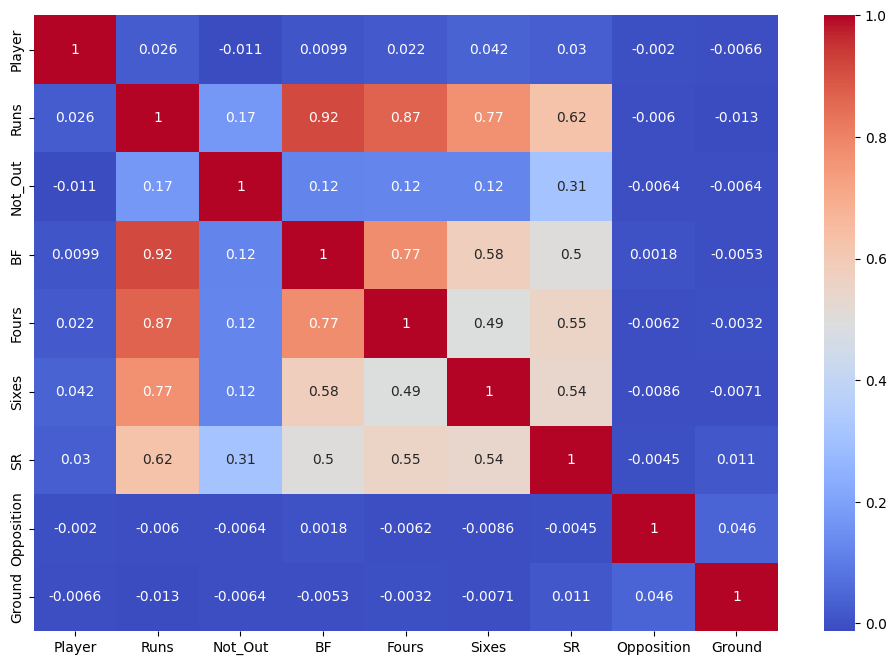

In [16]:
# import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

From this heatmap, it is apparent that a player's runs in a particular innings has a direct correlation to BF (Balls Faced), Fours, Sixes, and Strike Rate. However, we do not see any particular correlation to the Grounds and Oppositions.  

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Runs', axis=1)
y = df['Runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12377, 11)
(4126, 11)
(12377,)
(4126,)


## Decision Tree Regression

In [19]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

In [20]:
X_train['SR'].unique()

array([-0.99366391,  0.17998692,  0.86105773, ...,  1.51695007,
        1.30870599,  0.59967455])

In [21]:
X_train.columns

Index(['Player', 'Not_Out', 'BF', 'Fours', 'Sixes', 'SR', 'Inns', 'Opposition',
       'Ground', 'Player_Name', 'Country'],
      dtype='object')

In [22]:
X_train = X_train.drop(['Player_Name', 'Country'], axis=1)
X_test = X_test.drop(['Player_Name', 'Country'], axis=1)

In [23]:
X_train

,Player,Not_Out,BF,Fours,Sixes,SR,Inns,Opposition,Ground
14778,931,0,-0.818183,-0.550866,-0.396423,-0.993664,2,5,3
2375,427,0,1.815418,0.022586,0.569068,0.179987,1,80,23
3337,1585,0,0.416318,0.596038,0.569068,0.861058,2,36,99
10308,102,0,-0.653583,-0.550866,-0.396423,-0.298126,2,25,79
9423,950,0,-0.242083,-0.550866,-0.396423,-0.596233,1,36,35
...,...,...,...,...,...,...,...,...,...
11284,1724,0,-0.571283,-0.550866,-0.396423,-0.993664,1,3,103
11964,1204,0,-0.077483,-0.550866,-0.396423,-0.993664,1,80,23
5390,324,0,-0.159783,0.596038,-0.396423,0.919066,2,58,9
860,665,0,1.321618,1.742942,1.534558,1.574402,1,40,42


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter space
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 10],
}

# Use a grid search to find the best hyperparameters for the model
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a decision tree regressor with the best hyperparameters
dt = DecisionTreeRegressor(**best_params)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.010571994499631405


In [25]:
#training accuracy
dt.score(X_train, y_train)

0.9933423503699429

In [26]:
#predicting the Run of the batter
d_pred = dt.predict(X_test)

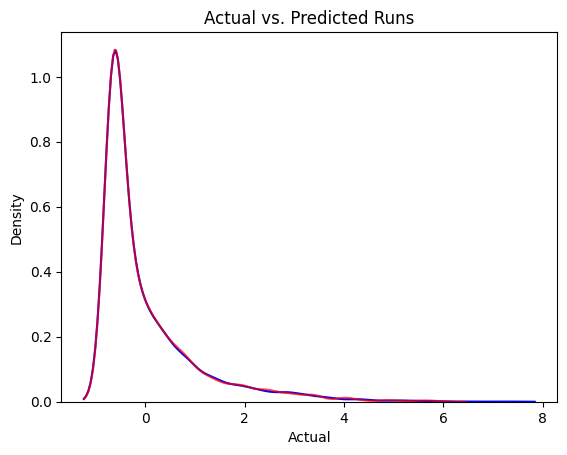

In [27]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)

# Create a figure and a subplot
fig, ax = plt.subplots(1, 1)

# Plot the kdeplot for the actual runs
sns.kdeplot(dft['Actual'], color='blue', ax=ax)

# Plot the kdeplot for the predicted runs
sns.kdeplot(dft['Predicted'], color='red', ax=ax, alpha=0.7)

# Set the title of the plot
ax.set_title('Actual vs. Predicted Runs')

# Show the plot
plt.show()

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2_dtr = r2_score(y_test, d_pred)
mse_dtr = mean_squared_error(y_test, d_pred)
mae_dtr = mean_absolute_error(y_test, d_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_test, d_pred))
print("R2 Score: ", r2_dtr)
print("Mean Squared Error: ", mse_dtr)
print("Mean Absolute Error: ", mae_dtr)
print('RMSE:', rmse_dtr)

R2 Score:  0.989633551067523
Mean Squared Error:  0.010571994499631405
Mean Absolute Error:  0.050497588336156383
RMSE: 0.10282020472471062


## Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [30]:
#training the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
#training accuracy
rfg.score(X_train, y_train)

0.9998294124845575

In [32]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)

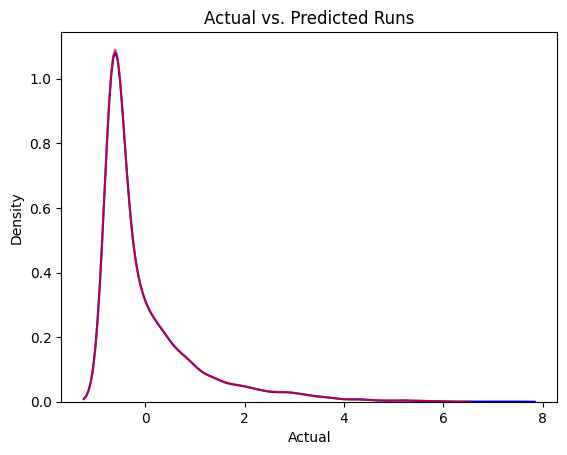

In [33]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)

# Create a figure and a subplot
fig, ax = plt.subplots(1, 1)

# Plot the kdeplot for the actual runs
sns.kdeplot(dfr['Actual'], color='blue', ax=ax)

# Plot the kdeplot for the predicted runs
sns.kdeplot(dfr['Predicted'], color='red', ax=ax, alpha=0.7)

# Set the title of the plot
ax.set_title('Actual vs. Predicted Runs')

# Show the plot
plt.show()

In [45]:
r2_rfr = r2_score(y_test, r_pred)
mse_rfr = mean_squared_error(y_test, r_pred)
mae_rfr = mean_absolute_error(y_test, r_pred)
rmse_rfr = np.sqrt(mean_squared_error(y_test, r_pred))
print("R2 Score: ", r2_rfr)
print("Mean Squared Error: ", mse_rfr)
print("Mean Absolute Error: ", mae_rfr)
print('RMSE:', rmse_rfr)

R2 Score:  0.9984831629925334
Mean Squared Error:  0.001546912795714954
Mean Absolute Error:  0.006974487139522672
RMSE: 0.039330812294115586


# Polynomial Regression

In [37]:
X = X.drop(['Player_Name', 'Country'], axis =1)

In [38]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [39]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))

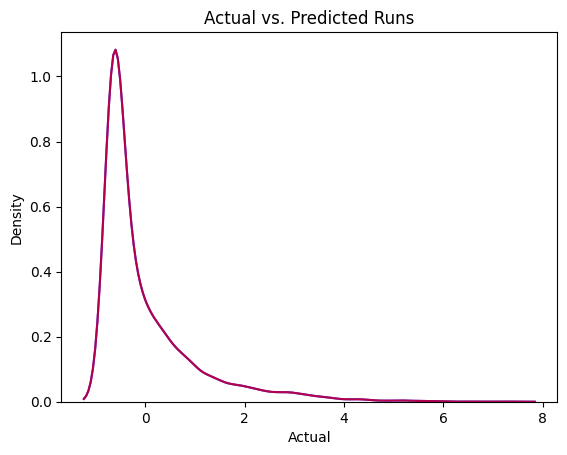

In [41]:
dfp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfp.reset_index(drop=True, inplace=True)

# Create a figure and a subplot
fig, ax = plt.subplots(1, 1)

# Plot the kdeplot for the actual runs
sns.kdeplot(dfp['Actual'], color='blue', ax=ax)

# Plot the kdeplot for the predicted runs
sns.kdeplot(dfp['Predicted'], color='red', ax=ax, alpha=0.7)

# Set the title of the plot
ax.set_title('Actual vs. Predicted Runs')

# Show the plot
plt.show()

In [48]:
r2_pnr = r2_score(y_test, y_pred)
mse_pnr = mean_squared_error(y_test, y_pred)
mae_pnr = mean_absolute_error(y_test, y_pred)
rmse_pnr = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_pnr)
print("Mean Squared Error: ", mse_pnr)
print("Mean Absolute Error: ", mae_pnr)
print('RMSE:', rmse_pnr)

R2 Score:  0.9999999992291188
Mean Squared Error:  7.861661998546522e-10
Mean Absolute Error:  1.5827963314827415e-05
RMSE: 2.8038655457326268e-05


Combining all the regression outputs

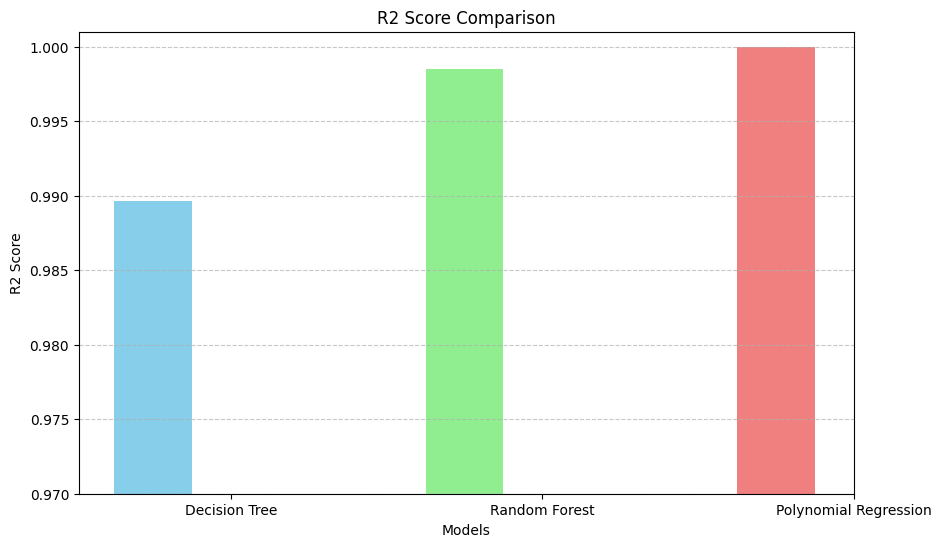

In [57]:
# Sample results for Decision Tree, Random Forest, and Linear Regression
models = ["Decision Tree", "Random Forest", "Polynomial Regression"]
r2_scores = [r2_dtr, r2_rfr, r2_pnr]

# Set the width of the bars
bar_width = 0.25

# Create an array of indices for the x-axis ticks
index = np.arange(len(models))

# Create a grouped bar chart for R2 Score
plt.figure(figsize=(10, 6))
plt.bar(index - bar_width, r2_scores, bar_width, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title("R2 Score Comparison")
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.ylim(0.97, 1.001)  # Set the y-axis limit
plt.xticks(index, models)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for reference
plt.show()

